DATA UNDERSTANDING

In [50]:
#Ignore warnings
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)


In [51]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\jamil\appdata\local\programs\python\python312\lib\site-packages (2.2.1)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'Tender.xlsx'

#Load each sheet into a DataFrame and add an index column to preserve the order.
releases = pd.read_excel(file_path, sheet_name='Releases').reset_index().rename(columns={'index': 'order_releases'})
planning = pd.read_excel(file_path, sheet_name='Planning').reset_index().rename(columns={'index': 'order_planning'})
tender = pd.read_excel(file_path, sheet_name='Tender').reset_index().rename(columns={'index': 'order_tender'})
awards = pd.read_excel(file_path, sheet_name='Awards').reset_index().rename(columns={'index': 'order_awards'})
awardSuppliers = pd.read_excel(file_path, sheet_name='AwardSuppliers').reset_index().rename(columns={'index': 'order_awardSuppliers'})
contracts = pd.read_excel(file_path, sheet_name='Contracts').reset_index().rename(columns={'index': 'order_contracts'})



# Group by 'ocid' and sum 'amount' in df4 (Awards)
awards_grouped = awards.groupby('ocid', as_index=False).agg({'amount': 'sum'})

# Merge 'df4_grouped' with the rest of the 'df4' DataFrame based on 'ocid' and delete duplicates.
awards_combined = awards.drop(columns='amount').drop_duplicates(subset=['ocid']).merge(awards_grouped, on='ocid', how='inner')

# Remove duplicates in df5 and df6 based on 'ocid'.
# This ensures that there is only one row per 'ocid' in these DataFrames before performing the merge.
awardSuppliers = awardSuppliers.drop_duplicates(subset=['ocid'])
contracts = contracts.drop_duplicates(subset=['ocid'])

In [53]:
# Merge df1, df2 y df3
combined_1 = releases.merge(planning, on='ocid', how='outer', suffixes=('_releases', '_planning'))
combined_1 = combined_1.merge(tender, on='ocid', how='outer', suffixes=('', '_tender'))

In [54]:
# Merge df4_combined y df5
combined_2 = awards_combined.merge(awardSuppliers, on='ocid', how='outer', suffixes=('_awards', '_awardSuppliers'))

# Ensure that there is only one row per 'ocid' in combined_2.
combined_2 = combined_2.drop_duplicates(subset=['ocid'])


In [55]:
# Merge the intermediate results and add Contracts.
final_combined = combined_1.merge(combined_2, on='ocid', how='outer')
final_combined = final_combined.merge(contracts, on='ocid', how='outer', suffixes=('', '_contracts'))

# Sort the final DataFrame based on the original order of the DataFrames.
final_combined = final_combined.sort_values(by=['order_releases', 'order_planning', 'order_tender', 'order_awards', 'order_awardSuppliers', 'order_contracts'], na_position='last')

# Remove the order columns before saving.
final_combined = final_combined.drop(columns=['order_releases', 'order_planning', 'order_tender', 'order_awards', 'order_awardSuppliers', 'order_contracts'])

# Save the combined dataframe in a new Excel file.
output_path = 'TenderCombinado.xlsx'
final_combined.to_excel(output_path, index=False)

print(f"The combined file has been saved in. {output_path}")

The combined file has been saved in. TenderCombinado.xlsx


Data volume

In [56]:
#Collected data
dfTender = pd.read_excel('TenderDatosRecolectados.xlsx')
dfTender.shape

(4038, 76)

Type of data and total

In [57]:
dfTender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 76 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ocid                                     4038 non-null   object 
 1   id_releases                              4038 non-null   object 
 2   initiationType                           4038 non-null   object 
 3   buyer_id                                 4038 non-null   object 
 4   buyer_name                               4038 non-null   object 
 5   language                                 4038 non-null   object 
 6   date_x                                   4038 non-null   object 
 7   tag                                      4038 non-null   object 
 8   id_planning                              4038 non-null   object 
 9   rationale                                4038 non-null   object 
 10  budget_id                                4009 no

Data quality

In [58]:
dfTender.isnull()

,ocid,id_releases,initiationType,buyer_id,buyer_name,language,date_x,tag,id_planning,rationale,...,description,status,contractPeriod_startDate_contracts,contractPeriod_endDate_contracts,contractPeriod_durationInDays_contracts,amount_contracts,currency_contracts,dateSigned,puntaje,ganador
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,False,False
4034,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4035,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4036,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


Description of the data

In [59]:
dfTender.describe()

,budget_description,budget_amount,value_amount,tenderPeriod_durationInDays,enquiryPeriod_durationInDays,hasEnquiries,awardPeriod_startDate,awardPeriod_durationInDays,numberOfTenderers,title_y,...,enteredValue_amount,enteredValue_currency,contractPeriod_maxExtentDate,contractPeriod_durationInDays,amount,title,description,contractPeriod_durationInDays_contracts,amount_contracts,puntaje
count,0.0,4.038000e+03,4.038000e+03,4038.000000,4037.000000,3979.0,0.0,0.0,4038.000000,0.0,...,0.0,0.0,0.0,626.000000,3.861000e+03,0.0,0.0,2757.000000,2.760000e+03,2537.000000
mean,NaN,1.475920e+06,1.475920e+06,20.198118,5.781769,1.0,NaN,NaN,5.270679,NaN,...,NaN,NaN,NaN,391.742812,1.291603e+06,NaN,NaN,371.979688,1.249064e+06,74.553047
std,NaN,2.926210e+06,2.926210e+06,7.758516,2.274886,0.0,NaN,NaN,4.951815,NaN,...,NaN,NaN,NaN,197.895995,2.646296e+06,NaN,NaN,210.979006,3.449833e+06,36.684800
min,NaN,1.345200e+03,1.345200e+03,3.000000,1.000000,1.0,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,5.000000,7.908100e+02,NaN,NaN,1.000000,5.353000e+01,0.090000
25%,NaN,3.943305e+04,3.943305e+04,15.000000,5.000000,1.0,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,300.000000,2.791412e+04,NaN,NaN,270.000000,2.367068e+04,62.390000
50%,NaN,6.247703e+05,6.247703e+05,18.000000,5.000000,1.0,NaN,NaN,3.000000,NaN,...,NaN,NaN,NaN,365.000000,5.350000e+05,NaN,NaN,365.000000,3.883668e+05,95.000000
75%,NaN,1.890033e+06,1.890033e+06,24.000000,7.000000,1.0,NaN,NaN,7.000000,NaN,...,NaN,NaN,NaN,366.000000,1.699222e+06,NaN,NaN,365.000000,1.528696e+06,99.890000
max,NaN,9.913644e+07,9.913644e+07,263.000000,43.000000,1.0,NaN,NaN,32.000000,NaN,...,NaN,NaN,NaN,1445.000000,9.860000e+07,NaN,NaN,3651.000000,1.044591e+08,100.000000


In [60]:
print(dfTender.columns)

Index(['ocid', 'id_releases', 'initiationType', 'buyer_id', 'buyer_name',
       'language', 'date_x', 'tag', 'id_planning', 'rationale', 'budget_id',
       'budget_description', 'budget_amount', 'budget_currency', 'release_id',
       'id', 'title_x', 'description_x', 'status_x', 'procuringEntity_id',
       'procuringEntity_name', 'value_amount', 'value_currency',
       'procurementMethod', 'procurementMethodDetails',
       'mainProcurementCategory', 'awardCriteria', 'tenderPeriod_startDate',
       'tenderPeriod_endDate', 'tenderPeriod_maxExtentDate',
       'tenderPeriod_durationInDays', 'enquiryPeriod_startDate',
       'enquiryPeriod_endDate', 'enquiryPeriod_maxExtentDate',
       'enquiryPeriod_durationInDays', 'hasEnquiries', 'eligibilityCriteria',
       'awardPeriod_startDate', 'awardPeriod_endDate',
       'awardPeriod_maxExtentDate', 'awardPeriod_durationInDays',
       'numberOfTenderers', 'release_id_awards', 'id_awards', 'title_y',
       'description_y', 'status_y', 

Data exploration

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\2021456236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=budget_amount_counts.values, y=budget_amount_counts.index, palette='light:#5A9_r')


Text(0.5, 1.0, 'Budget of Contracting Entities (intervals of 500k)')

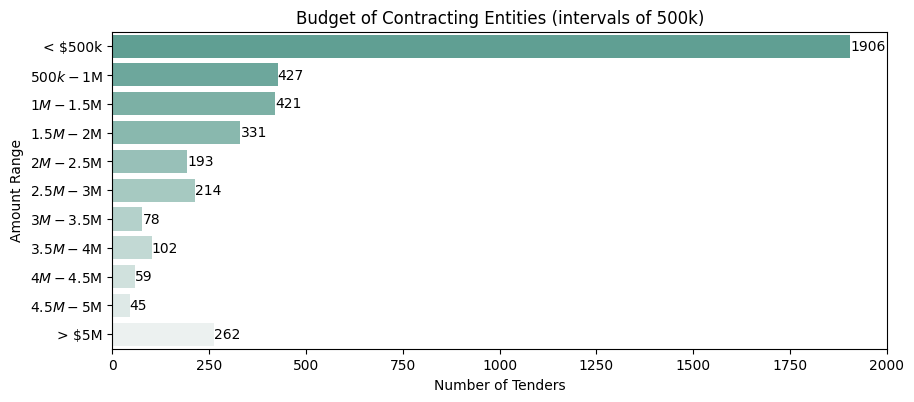

In [61]:
# Define the intervals for the amount ranges (intervals of 500k up to 7 million)
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, float('inf')]
labels = ['< $500k', '$500k - $1M', '$1M - $1.5M', '$1.5M - $2M', '$2M - $2.5M', '$2.5M - $3M', '$3M - $3.5M', '$3.5M - $4M', '$4M - $4.5M', '$4.5M - $5M', '> $5M']

# Count the number of occurrences in each interval without explicitly creating an additional column for budget_amount.
budget_amount_counts = pd.cut(dfTender['budget_amount'], bins=bins, labels=labels).value_counts().reindex(labels)

# Count the number of occurrences in each interval without explicitly creating an additional column for amount
amount_counts = pd.cut(dfTender['amount'], bins=bins, labels=labels).value_counts().reindex(labels)

# Create the figure with subplots.
plt.figure(figsize=(10, 14))

# Create the bar chart for budget_amount
plt.subplot(3, 1, 1)
sns.barplot(x=budget_amount_counts.values, y=budget_amount_counts.index, palette='light:#5A9_r')
for index, value in enumerate(budget_amount_counts.values):
    plt.text(value, index, str(value), va='center')
plt.xlabel('Number of Tenders')
plt.ylabel('Amount Range')
plt.title('Budget of Contracting Entities (intervals of 500k)')

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\103671318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='light:#5A9_r')


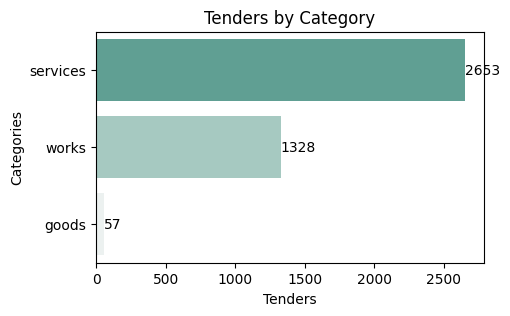

In [62]:
# Count the number of occurrences in each category of the mainProcurementCategory column.
category_counts = dfTender['mainProcurementCategory'].value_counts()

# Create the bar chart for mainProcurementCategory
plt.figure(figsize=(5, 3))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='light:#5A9_r')

# Add custom labels to the bars
for index, value in enumerate(category_counts.values):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Tenders')
plt.ylabel('Categories')
plt.title('Tenders by Category')
plt.show()

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\3533697703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=criteria_df['Count'], y=criteria_df['Criteria'], palette='light:#5A9_r')


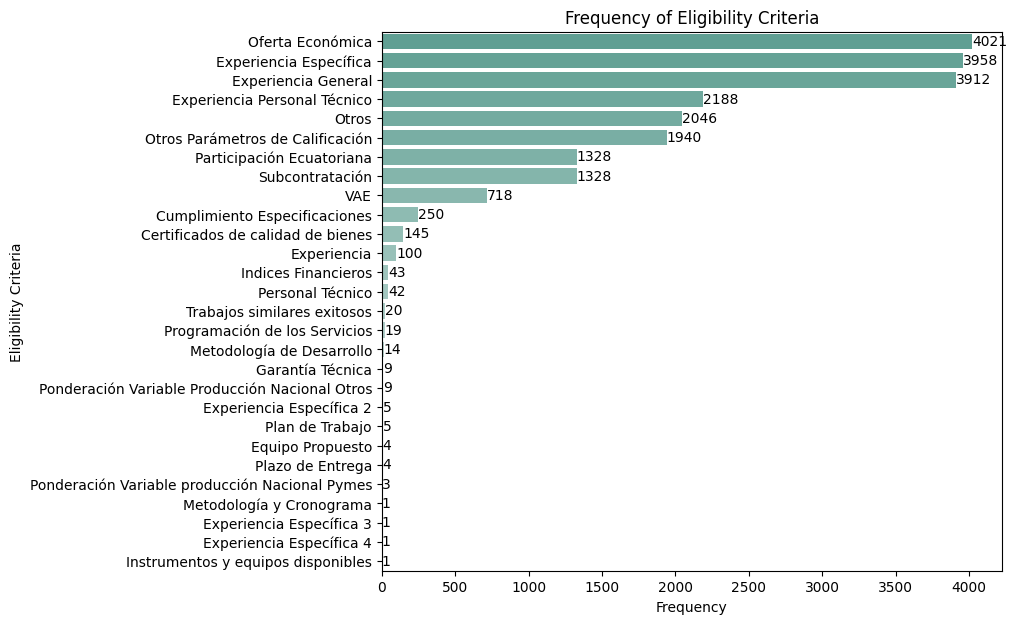

In [63]:
from collections import Counter

# Split the criteria and count the frequency of each
criteria_list = dfTender['eligibilityCriteria'].dropna().str.split(',').tolist()
flat_criteria_list = [item.strip() for sublist in criteria_list for item in sublist]
criteria_counts = Counter(flat_criteria_list)

# Convertir los resultados en un DataFrame
criteria_df = pd.DataFrame(criteria_counts.items(), columns=['Criteria', 'Count']).sort_values(by='Count', ascending=False)

# Crear el histograma para eligibilityCriteria
plt.figure(figsize=(8, 7))
sns.barplot(x=criteria_df['Count'], y=criteria_df['Criteria'], palette='light:#5A9_r')

# Agregar etiquetas personalizadas a las barras
for index, value in enumerate(criteria_df['Count']):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Frequency')
plt.ylabel('Eligibility Criteria')
plt.title('Frequency of Eligibility Criteria')
plt.show()

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\4147426272.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tenderers_counts.values, y=tenderers_counts.index, palette='light:#5A9_r')


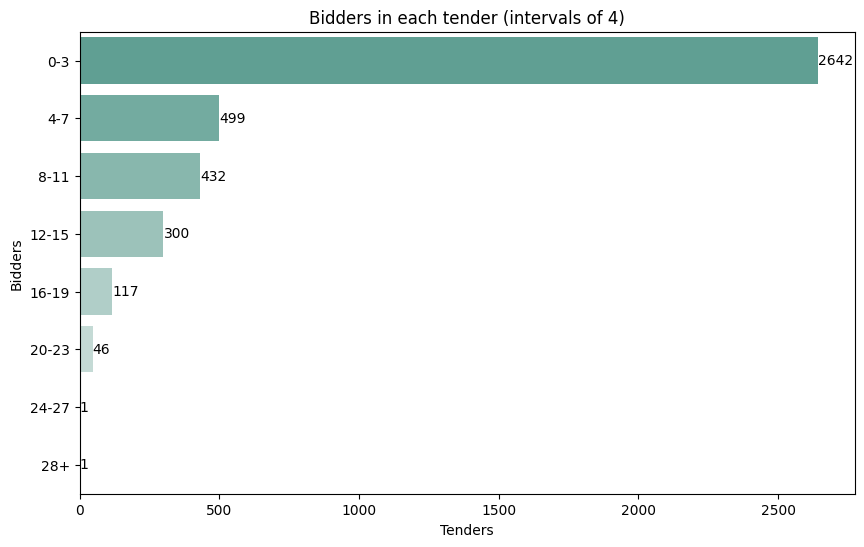

In [64]:
# Define the intervals for the ranges of numberOfTenderers with an interval of 4, considering the maximum number is 32
bins = list(range(0, 32, 4)) + [float('inf')]
labels = [f'{i}-{i+3}' for i in range(0, 28, 4)] + ['28+']

# Count the number of occurrences in each interval without explicitly creating an additional column
tenderers_counts = pd.cut(dfTender['numberOfTenderers'], bins=bins, labels=labels).value_counts().reindex(labels)

# Create the bar chart with custom labels
plt.figure(figsize=(10, 6))
sns.barplot(x=tenderers_counts.values, y=tenderers_counts.index, palette='light:#5A9_r')

# Add custom labels to the bars
for index, value in enumerate(tenderers_counts.values):
    plt.text(value, index, str(value), va='center')

plt.xlabel('Tenders')
plt.ylabel('Bidders')
plt.title('Bidders in each tender (intervals of 4)')
plt.show()

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\3207571350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')


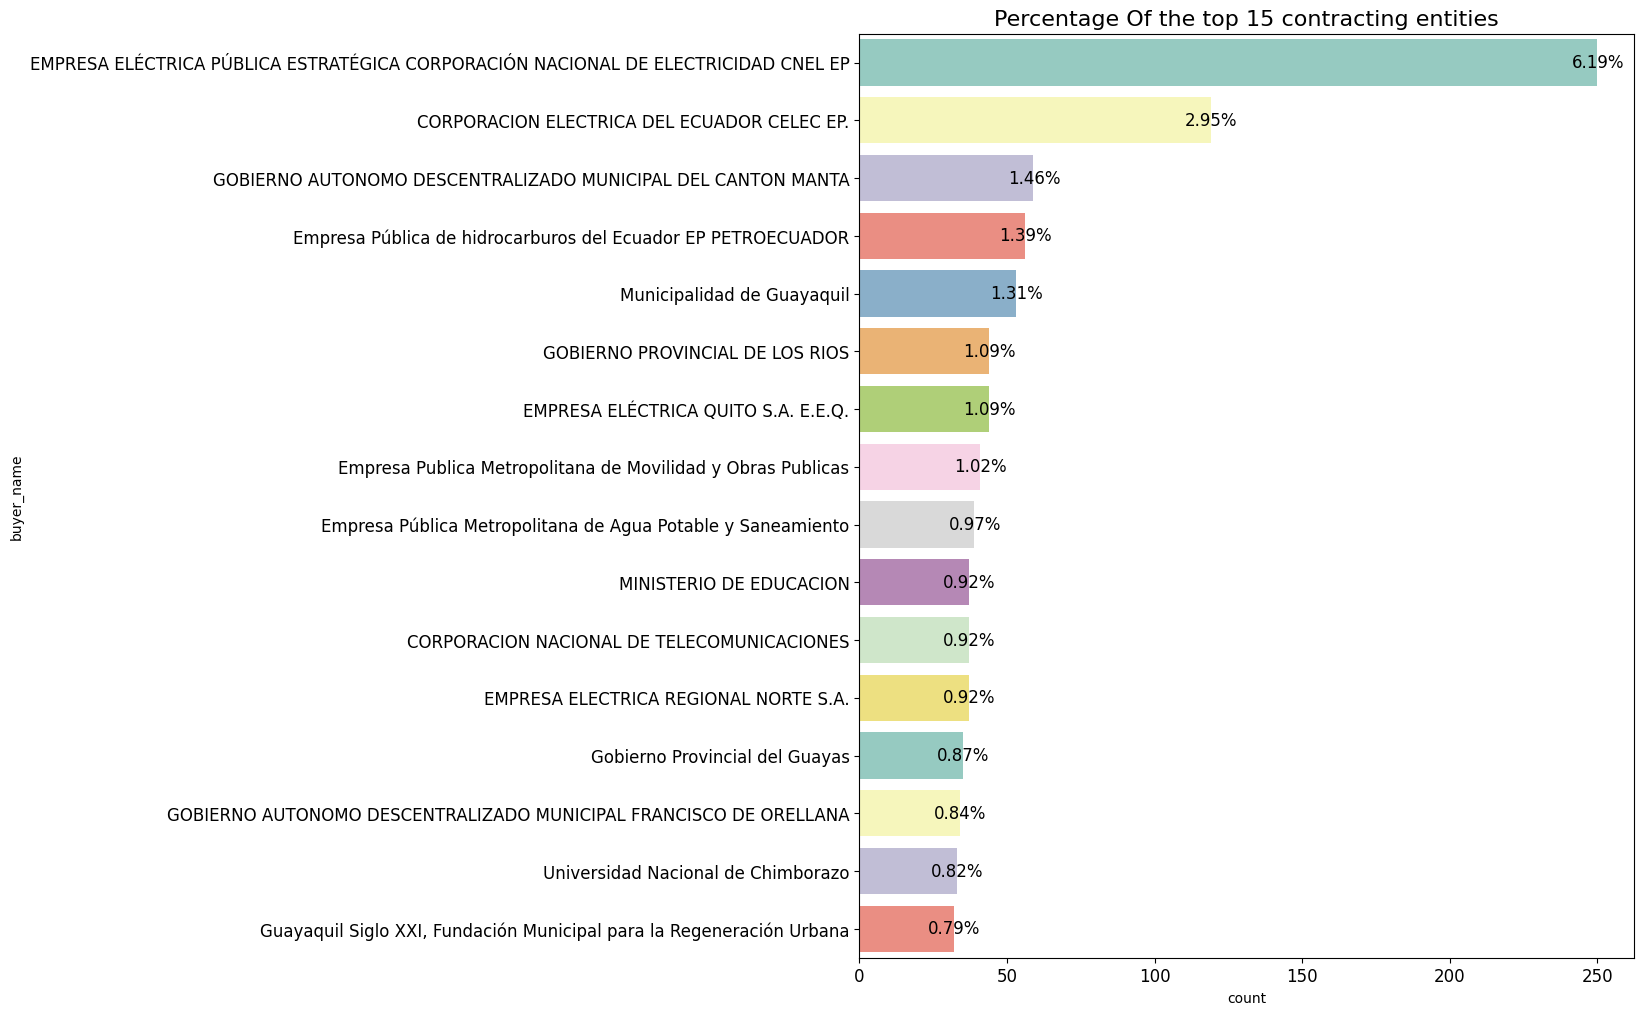

C:\Users\jamil\AppData\Local\Temp\ipykernel_41464\3207571350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')


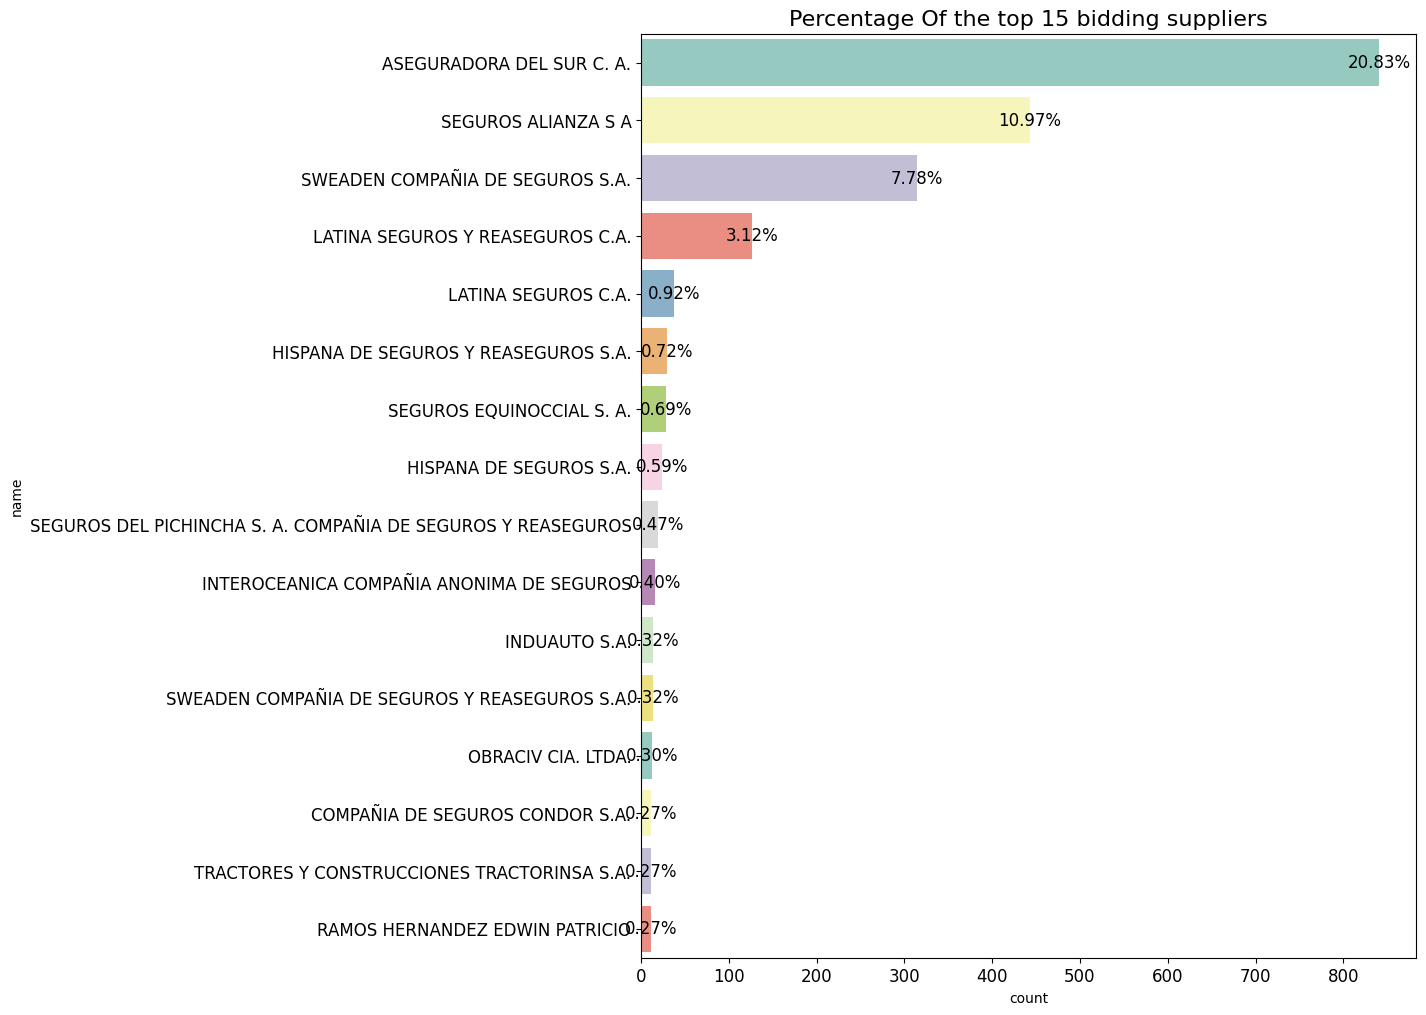

In [65]:
def plot_count(feature, title, df, size=1):
    # Adjust the plot size to make it taller and less wide
    f, ax = plt.subplots(1, 1, figsize=(10, 12))
    total = float(len(df))
    g = sns.countplot(y=dfTender[feature], order=dfTender[feature].value_counts().index[:16], palette='Set3')
    g.set_title("Percentage {}".format(title), fontsize=16)  # Title size
    if size > 2:
        plt.yticks(size=12)  # Y-axis label size
        plt.xticks(size=12)  # X-axis label size
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.2,
                p.get_y() + p.get_height() / 2,
                '{:1.2f}%'.format(100 * width / total),
                ha="center",
                va="center",
                fontsize=12)  # Text label size
    plt.show()

# Create the plot for buyer_name
plot_count("buyer_name", "Of the top 15 contracting entities", dfTender, size=4)

# Create the plot for procuringEntity_name
plot_count("name", "Of the top 15 bidding suppliers", dfTender, size=4)

Dataset quality

ocid                     0
id_releases              0
initiationType           0
buyer_id                 0
buyer_name               0
                      ... 
amount_contracts      1278
currency_contracts    1278
dateSigned            1278
puntaje               1501
ganador               1501
Length: 76, dtype: int64


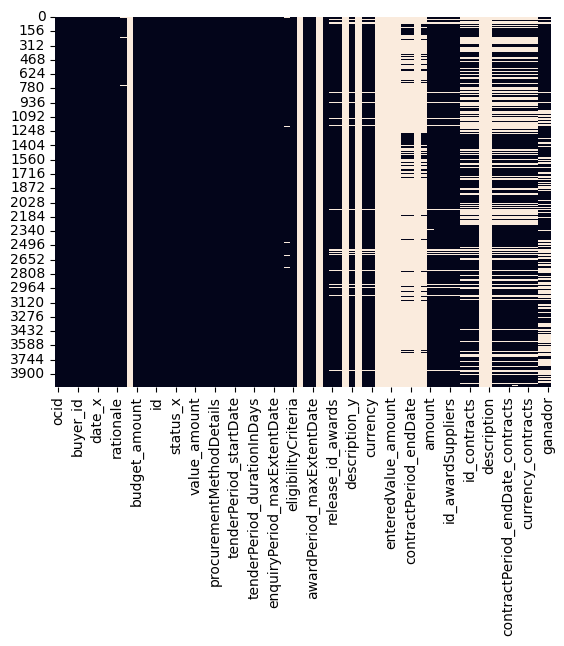

In [66]:
# Check for missing values
print(dfTender.isnull().sum())

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dfTender.isnull(), cbar=False)
plt.show()


Data Preparation

In [67]:
# Selection of Relevant Variables
df= dfTender[['budget_amount','mainProcurementCategory','tenderPeriod_durationInDays','numberOfTenderers','amount','contractPeriod_durationInDays', 'ganador','eligibilityCriteria']]

In [68]:
# Check for empty cells per column
empty_cells = df.isnull().sum()
print(empty_cells)


budget_amount                       0
mainProcurementCategory             0
tenderPeriod_durationInDays         0
numberOfTenderers                   0
amount                            177
contractPeriod_durationInDays    3412
ganador                          1501
eligibilityCriteria                 0
dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  4038 non-null   float64
 1   mainProcurementCategory        4038 non-null   object 
 2   tenderPeriod_durationInDays    4038 non-null   int64  
 3   numberOfTenderers              4038 non-null   int64  
 4   amount                         3861 non-null   float64
 5   contractPeriod_durationInDays  626 non-null    float64
 6   ganador                        2537 non-null   object 
 7   eligibilityCriteria            4038 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 252.5+ KB


In [70]:
# Impute missing values with the median
df = df.fillna({'contractPeriod_durationInDays': df['contractPeriod_durationInDays'].median()})


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  4038 non-null   float64
 1   mainProcurementCategory        4038 non-null   object 
 2   tenderPeriod_durationInDays    4038 non-null   int64  
 3   numberOfTenderers              4038 non-null   int64  
 4   amount                         3861 non-null   float64
 5   contractPeriod_durationInDays  4038 non-null   float64
 6   ganador                        2537 non-null   object 
 7   eligibilityCriteria            4038 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 252.5+ KB


In [72]:
# Drop rows with NaN values in any column
df = df.dropna()

In [73]:
# Check for empty cells per column
empty_cells = df.isnull().sum()
print(empty_cells)

# Get the number of records
record_count = df.shape[0]
print("Number of records:", record_count)

budget_amount                    0
mainProcurementCategory          0
tenderPeriod_durationInDays      0
numberOfTenderers                0
amount                           0
contractPeriod_durationInDays    0
ganador                          0
eligibilityCriteria              0
dtype: int64
Number of records: 2536


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 4037
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   budget_amount                  2536 non-null   float64
 1   mainProcurementCategory        2536 non-null   object 
 2   tenderPeriod_durationInDays    2536 non-null   int64  
 3   numberOfTenderers              2536 non-null   int64  
 4   amount                         2536 non-null   float64
 5   contractPeriod_durationInDays  2536 non-null   float64
 6   ganador                        2536 non-null   object 
 7   eligibilityCriteria            2536 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 178.3+ KB


In [75]:
# Create a list to store all the words from eligibilityCriteria
all_criteria = []

# Iterate through each row in the 'eligibilityCriteria' column and split by commas
for criteria in df['eligibilityCriteria']:
    # Split the criteria by comma and add to the list
    all_criteria.extend(criteria.split(','))

# Create a temporary DataFrame to count the frequency of each criterion
criteria_counts = pd.Series(all_criteria).value_counts()

# To view the results in a visual table
criteria_counts_df = criteria_counts.reset_index().rename(columns={'index': 'Criteria', 0: 'Count'})
criteria_counts_df.head(10)  # Show the top 10 most common criteria


,Criteria,count
0,Oferta Económica,2529
1,Experiencia Específica,2496
2,Experiencia General,2467
3,Experiencia Personal Técnico,1500
4,Otros,1437
5,Otros Parámetros de Calificación,1073
6,Participación Ecuatoriana,916
7,Subcontratación,916
8,VAE,521
9,Cumplimiento Especificaciones,138


In [76]:
# Ensure all values in the 'eligibilityCriteria' column are strings
df['eligibilityCriteria'] = df['eligibilityCriteria'].astype(str)

# Replace "Otros Parámetros de Calificación" with "Otros"
df['eligibilityCriteria'] = df['eligibilityCriteria'].str.replace('Otros Parámetros de Calificación', 'Otros')

# Define specific parameters
specific_parameters = [
    'Oferta Económica',
    'Experiencia Específica',
    'Experiencia General',
    'Experiencia Personal Técnico',
    'Otros',
    'Participación Ecuatoriana',
    'VAE'
]

# Create binary columns for each specific criterion
for criterion in specific_parameters:
    df[criterion] = df['eligibilityCriteria'].apply(lambda x: 1 if criterion in x else 0)


In [77]:
from sklearn.preprocessing import LabelEncoder

# Create a function to apply LabelEncoder to each categorical column and replace the originals
def encode_labels(df, columns):
    label_encoders = {}
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Specify the columns you want to encode
columns_to_encode = ['mainProcurementCategory', 'ganador']

# Apply the encoding
df_encoded, encoders = encode_labels(df, columns_to_encode)

# Drop the 'eligibilityCriteria' column
df = df.drop('eligibilityCriteria', axis=1)

# Show the mapping of categories to numbers for each encoded column
print("\nEncoded categories:")
for column, encoder in encoders.items():
    print(f"\nEncoded categories for '{column}':")
    for i, category in enumerate(encoder.classes_):
        print(f"{category} -> {i}")



Encoded categories:

Encoded categories for 'mainProcurementCategory':
goods -> 0
services -> 1
works -> 2

Encoded categories for 'ganador':
no -> 0
si -> 1


In [78]:
# Rename columns

df.rename(columns={
    'budget_amount': 'Budget',
    'mainProcurementCategory': 'MainCategory',
    'tenderPeriod_durationInDays': 'TenderDurationDays',
    'numberOfTenderers': 'NumberOfTenderers',
    'amount': 'BidAmount',
    'contractPeriod_durationInDays': 'ContractDurationDays',
    'ganador': 'Winner',
    'Oferta Económica': 'EconomicOffer',
    'Experiencia Específica': 'SpecificExperience',
    'Experiencia General': 'GeneralExperience',
    'Experiencia Personal Técnico': 'TechnicalStaffExperience',
    'Otros': 'OtherQualificationParameters',
    'Participación Ecuatoriana': 'EcuadorianParticipation',
    'VAE': 'EcuadorianAddedValue'
}, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2536 entries, 0 to 4037
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Budget                        2536 non-null   float64
 1   MainCategory                  2536 non-null   int32  
 2   TenderDurationDays            2536 non-null   int64  
 3   NumberOfTenderers             2536 non-null   int64  
 4   BidAmount                     2536 non-null   float64
 5   ContractDurationDays          2536 non-null   float64
 6   Winner                        2536 non-null   int32  
 7   EconomicOffer                 2536 non-null   int64  
 8   SpecificExperience            2536 non-null   int64  
 9   GeneralExperience             2536 non-null   int64  
 10  TechnicalStaffExperience      2536 non-null   int64  
 11  OtherQualificationParameters  2536 non-null   int64  
 12  EcuadorianParticipation       2536 non-null   int64  
 13  Ecuadori

In [79]:
df = df.reset_index(drop=True)


<Axes: >

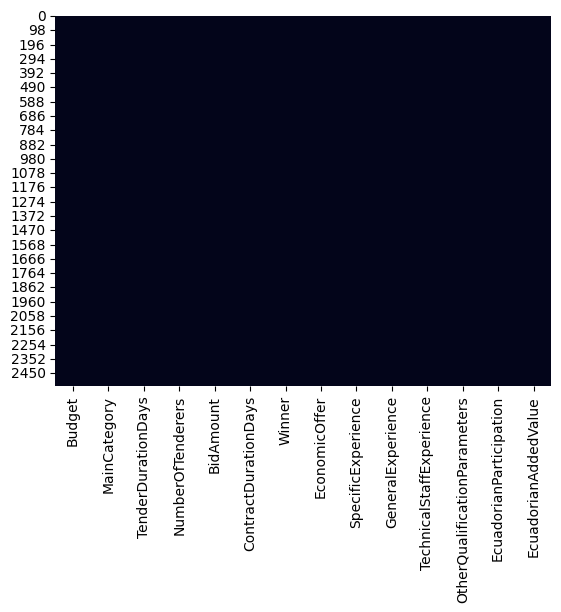

In [80]:
sns.heatmap(df.isnull(), cbar=False)

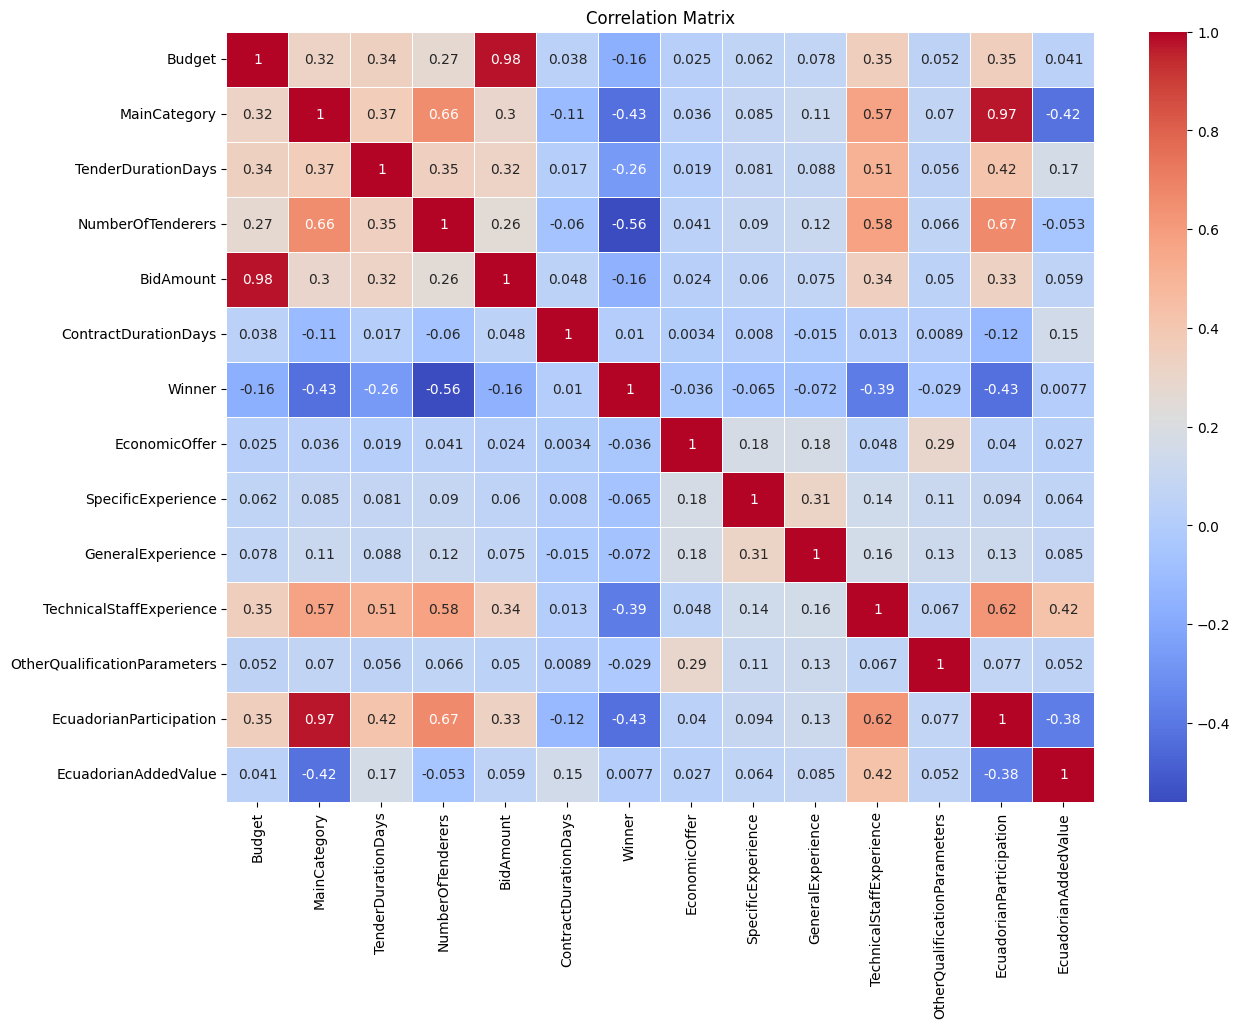

In [81]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Adjust the figure size
plt.figure(figsize=(14, 10))  # You can adjust the figure size according to your needs

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [82]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Create the Isolation Forest model
iso_forest = IsolationForest(contamination=0.02, random_state=2021)

# Fit the model
iso_forest.fit(df)

# Make predictions
y_pred = iso_forest.predict(df)

# Filter outliers
df = df[y_pred == 1]

# Show the number of records after removing outliers
print("Number of records:", df.shape[0])


Number of records: 2485


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2485 entries, 0 to 2535
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Budget                        2485 non-null   float64
 1   MainCategory                  2485 non-null   int32  
 2   TenderDurationDays            2485 non-null   int64  
 3   NumberOfTenderers             2485 non-null   int64  
 4   BidAmount                     2485 non-null   float64
 5   ContractDurationDays          2485 non-null   float64
 6   Winner                        2485 non-null   int32  
 7   EconomicOffer                 2485 non-null   int64  
 8   SpecificExperience            2485 non-null   int64  
 9   GeneralExperience             2485 non-null   int64  
 10  TechnicalStaffExperience      2485 non-null   int64  
 11  OtherQualificationParameters  2485 non-null   int64  
 12  EcuadorianParticipation       2485 non-null   int64  
 13  Ecuadori

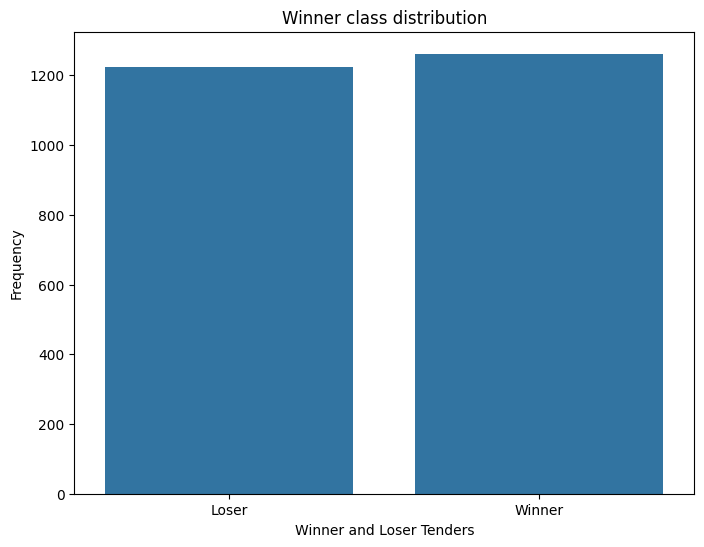

In [84]:
# View the distribution of the "Winner" class
plt.figure(figsize=(8, 6))
sns.countplot(x='Winner', data=df)
plt.title('Winner class distribution')
plt.xlabel('Winner and Loser Tenders')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Loser', 'Winner'])
plt.show()

# Show the distribution of the "Winner"


MODELADING

In [85]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
dfModel = df[['NumberOfTenderers', 'MainCategory', 'Budget', 'BidAmount', 'Winner', 'TenderDurationDays', 'ContractDurationDays']]

X = dfModel.drop('Winner', axis=1)
y = dfModel['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)


In [86]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train the AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=2021)
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred_ada_boost = ada_boost.predict(X_test)

# Evaluate the model
print(f"AdaBoost F1 Score: {f1_score(y_test, y_pred_ada_boost, average='macro'):.4f}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada_boost):.4f}")


c:\Users\jamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost F1 Score: 0.7851
AdaBoost Accuracy: 0.7855


In [87]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from catboost import CatBoostClassifier

# Create the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Fit the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the model
print(f"CatBoost F1 Score: {f1_score(y_test, y_pred_catboost, average='macro'):.4f}")
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost):.4f}")


CatBoost F1 Score: 0.8043
CatBoost Accuracy: 0.8056


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the classifier
rf = RandomForestClassifier(random_state=2021)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(f"Random Forest F1 Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")


Random Forest F1 Score: 0.6741
Random Forest Accuracy: 0.6743


EVALUATION

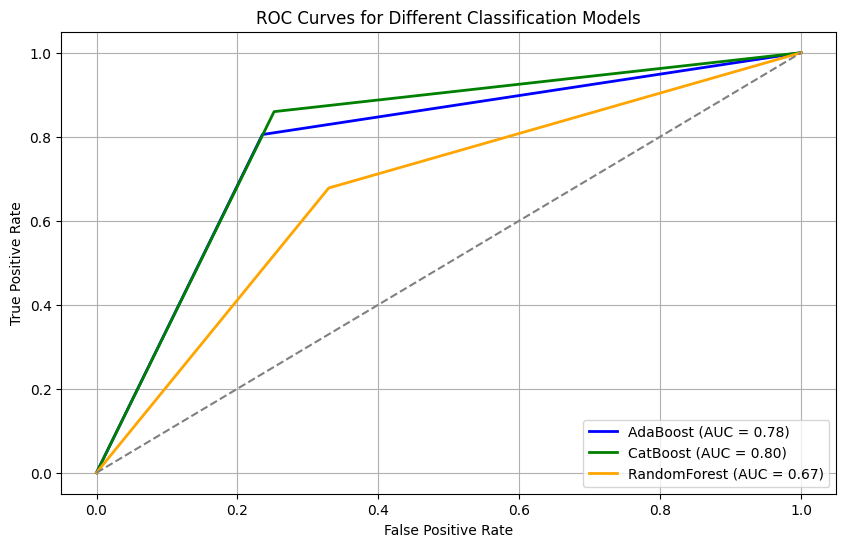

In [90]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve and AUC for each model
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada_boost)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_catboost)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

roc_auc_ada = auc(fpr_ada, tpr_ada)
roc_auc_cat = auc(fpr_cat, tpr_cat)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_ada, tpr_ada, color='blue', lw=2, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_ada))
plt.plot(fpr_cat, tpr_cat, color='green', lw=2, label='CatBoost (AUC = {:.2f})'.format(roc_auc_cat))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='RandomForest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classification Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       361
           1       0.78      0.86      0.82       385

    accuracy                           0.81       746
   macro avg       0.81      0.80      0.80       746
weighted avg       0.81      0.81      0.80       746



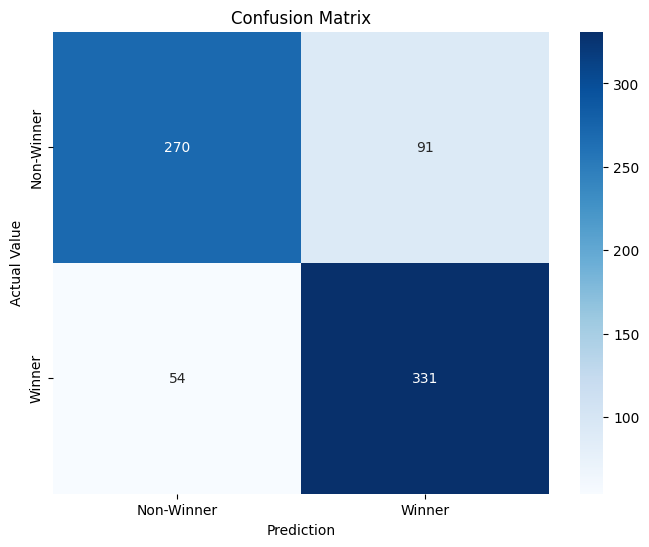

In [91]:
# Model evaluation
# Classification report
report = classification_report(y_test, y_pred_catboost)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Winner', 'Winner'],  # Class labels on the x-axis
            yticklabels=['Non-Winner', 'Winner'])  # Class labels on the y-axis
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       361
           1       0.69      0.68      0.68       385

    accuracy                           0.67       746
   macro avg       0.67      0.67      0.67       746
weighted avg       0.67      0.67      0.67       746



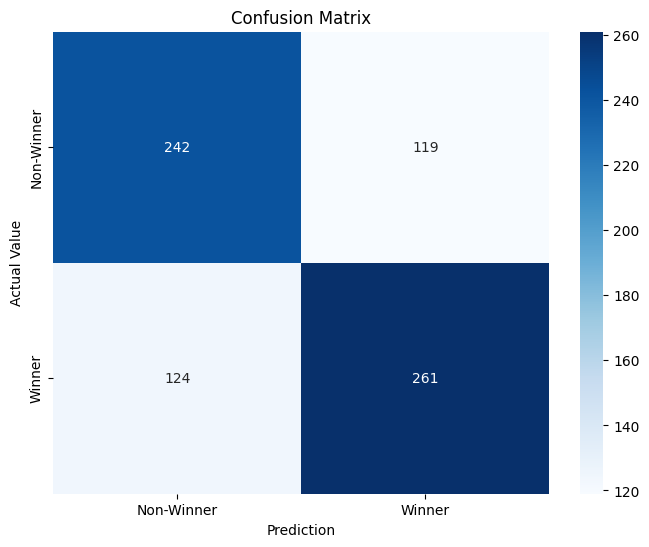

In [92]:
# Model evaluation
# Classification report
report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Winner', 'Winner'],  # Class labels on the x-axis
            yticklabels=['Non-Winner', 'Winner'])  # Class labels on the y-axis
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       361
           1       0.78      0.81      0.79       385

    accuracy                           0.79       746
   macro avg       0.79      0.78      0.79       746
weighted avg       0.79      0.79      0.79       746



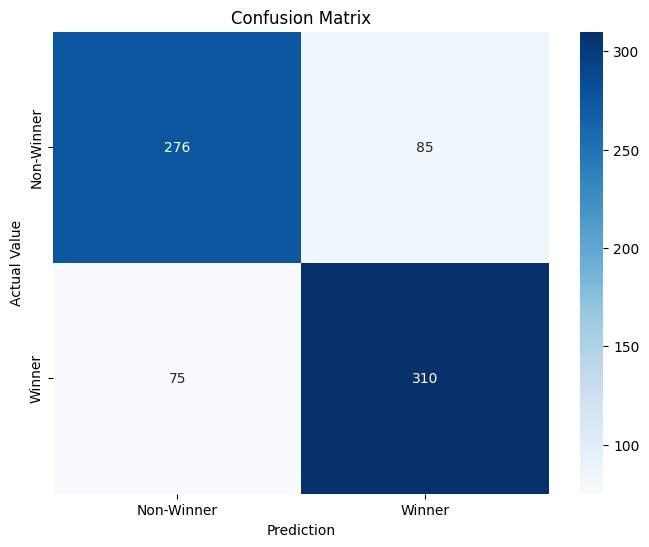

In [93]:
# Model evaluation
# Classification report
report = classification_report(y_test, y_pred_ada_boost)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_ada_boost)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Winner', 'Winner'],  # Class labels on the x-axis
            yticklabels=['Non-Winner', 'Winner'])  # Class labels on the y-axis
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()


XAI

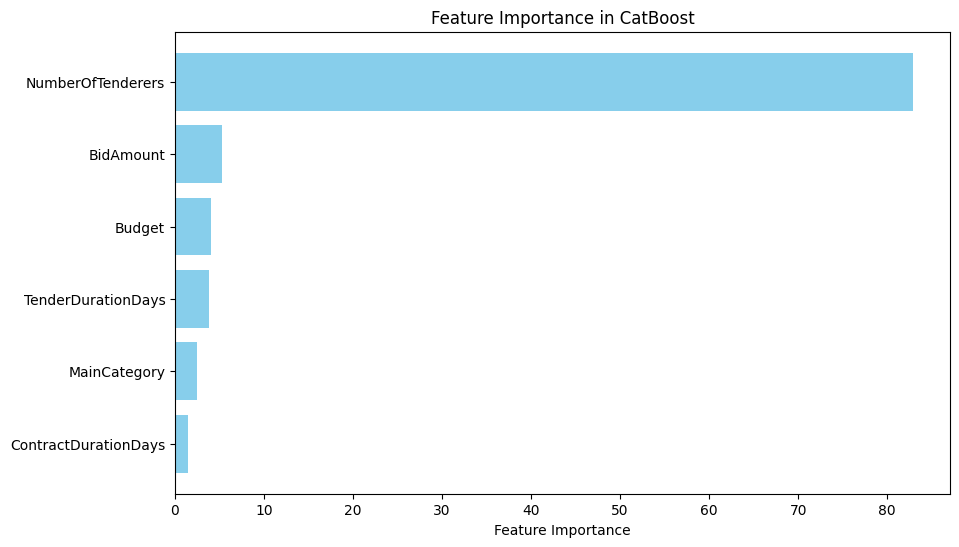

In [94]:
# Feature Importance
# Get the feature importance
feature_importances = catboost_model.get_feature_importance()
feature_names = X_train.columns

# Sort the features by their importance from highest to lowest
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Reorder the features and their importances
sorted_feature_names = feature_names[indices]
sorted_feature_importances = feature_importances[indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in CatBoost")
plt.gca().invert_yaxis()  # Invert the Y-axis so that the most important feature is at the top
plt.show()


In [95]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


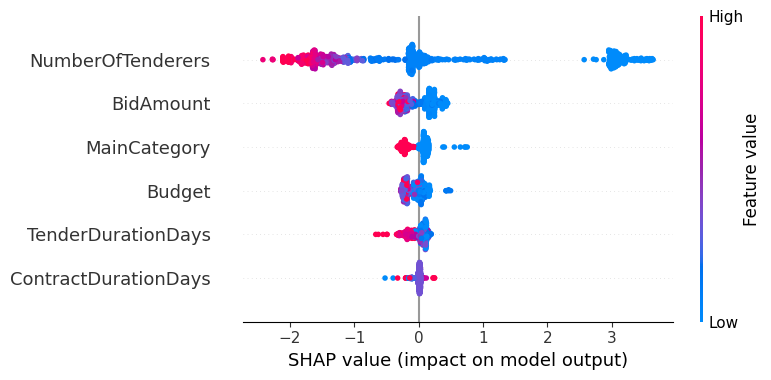

In [96]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


DEPLOYMENT

In [97]:
# Save the model to a .cbm file
catboost_model.save_model('catboost_model.cbm')